recording...............
recording complete
recording shape (176400,)
sampling rate 22050


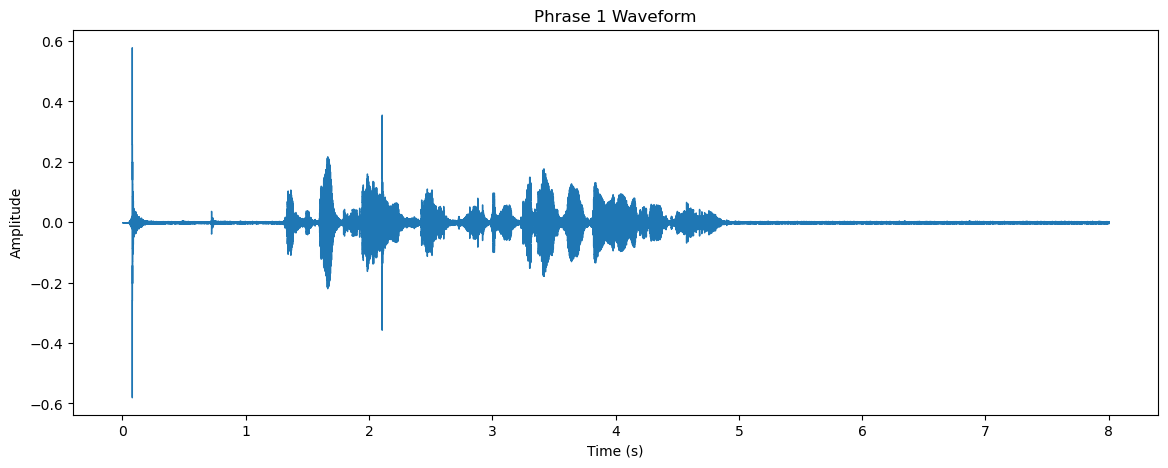

recording...............
recording complete
recording shape (176400,)
sampling rate 22050


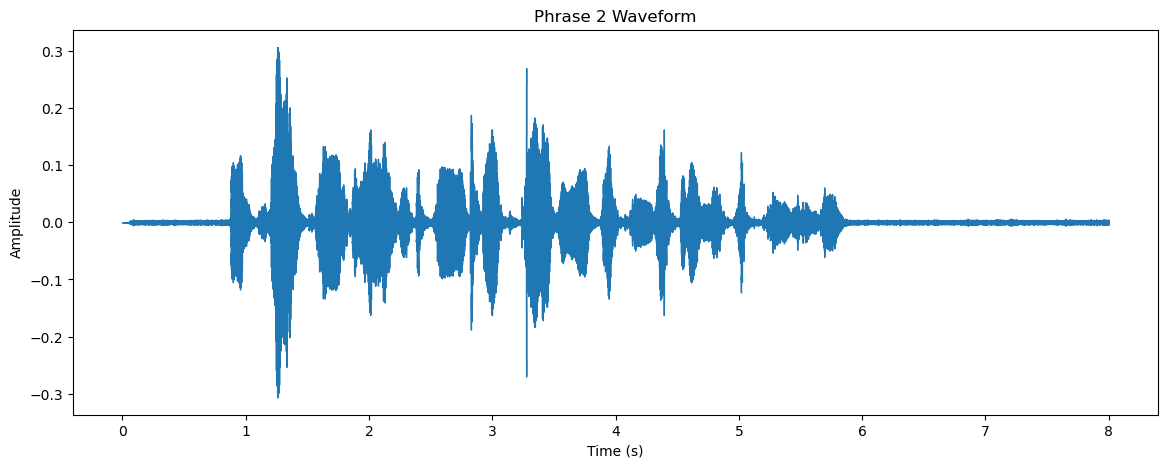

recording...............
recording complete
recording shape (176400,)
sampling rate 22050


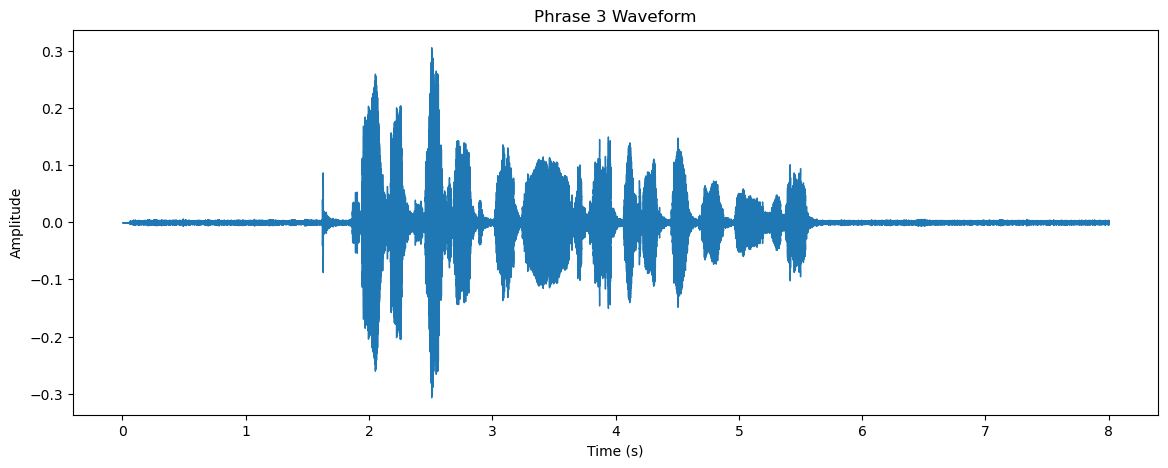

In [55]:
#When run this code will record three 8s audio signals and save them as wav files

# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

def record_audio(filename, duration=8, sr=44100):
    # Start audio recording
    recording = sd.rec(int(duration*sr), samplerate=sr, channels=1) # record in mono

    # Record audio for the given duration
    print("recording...............")
    sd.wait()
    print("recording complete")
    
    #Write to file 
    write(filename, sr, recording)


def audio1():
    record = record_audio(filename = "phrase1.wav")
    plot = plot_audio(filename = "phrase1.wav", plotname = 'Phrase 1 Waveform')
    
def audio2():
    record = record_audio(filename = "phrase2.wav")
    plot = plot_audio(filename = "phrase2.wav", plotname = 'Phrase 2 Waveform')
    
def audio3():
    record = record_audio(filename = "phrase3.wav")
    plot = plot_audio(filename = "phrase3.wav", plotname = 'Phrase 3 Waveform')

# Look at the discrete number array we got from audio plot
def plot_audio(filename, plotname):
    x, sr = librosa.load(filename)
    print("recording shape", x.shape)
    print("sampling rate", sr)

    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    plt.title(plotname)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

audio1()
audio2()
audio3()



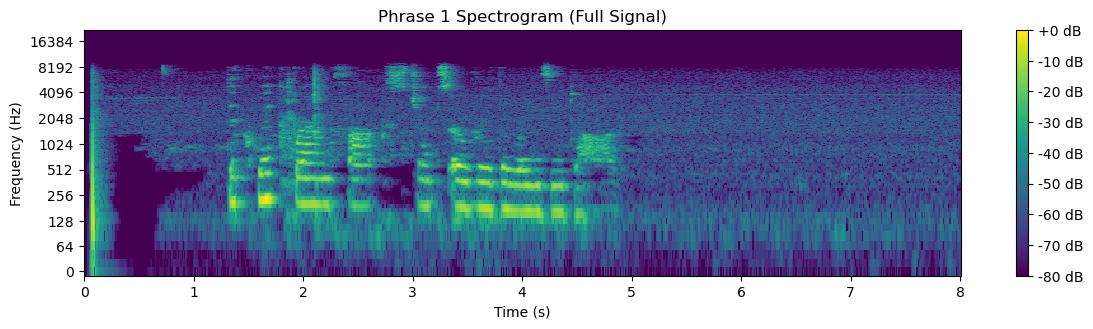

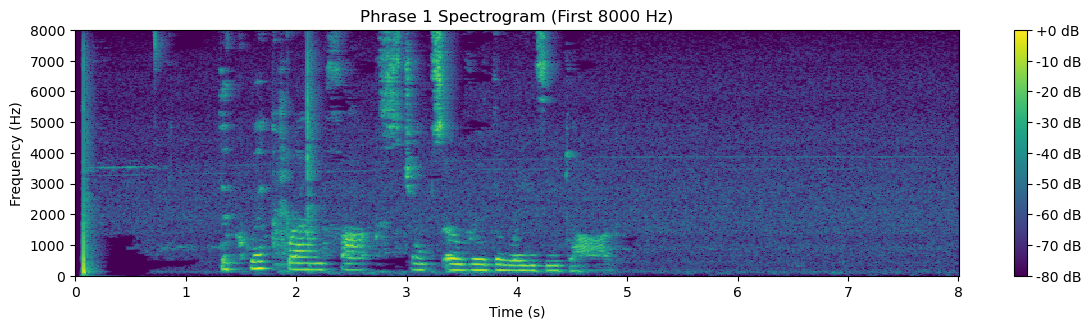

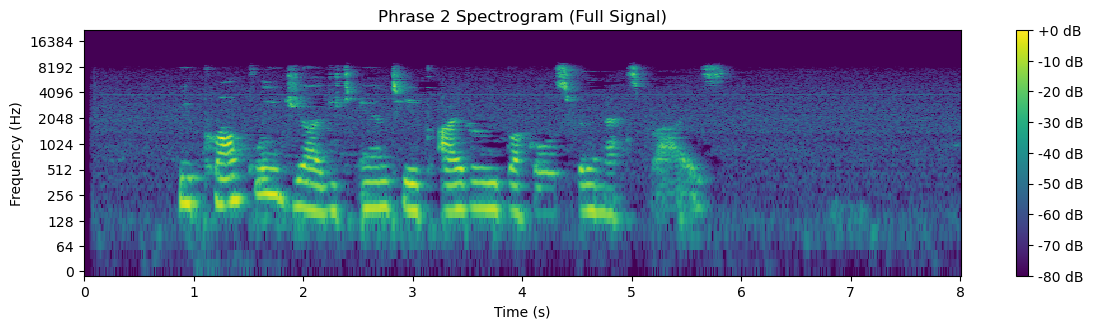

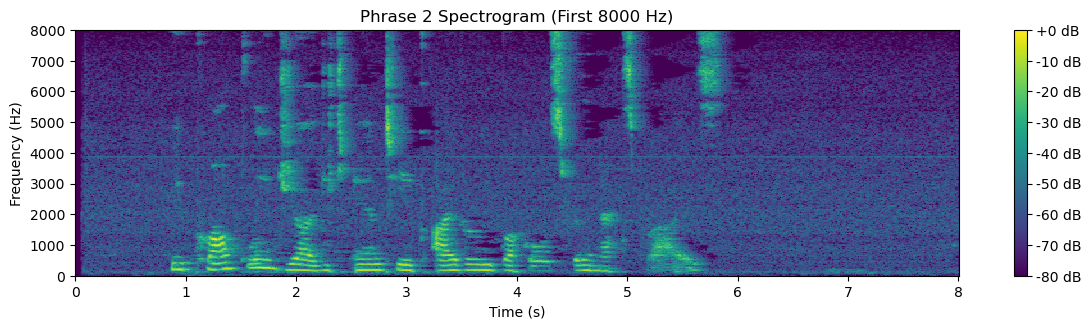

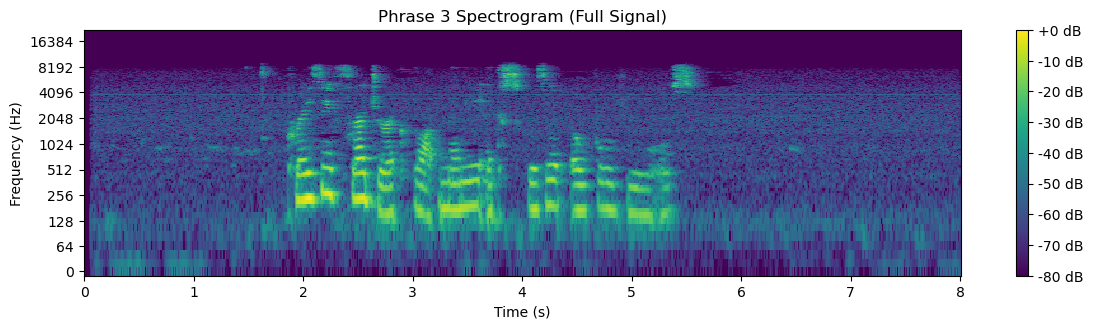

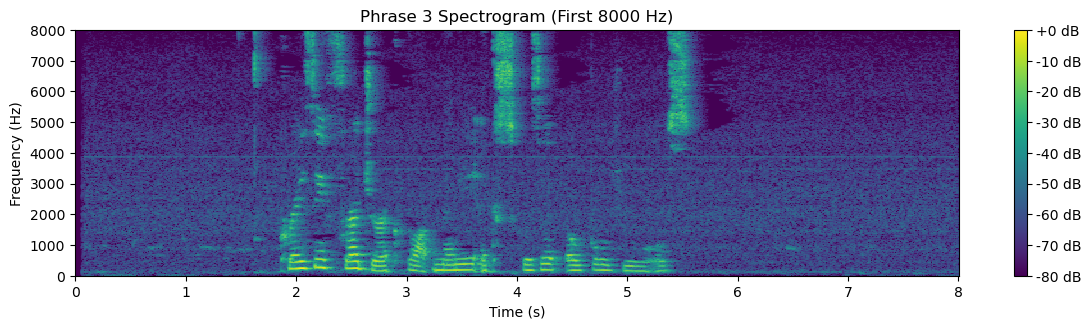

In [3]:
#When run with code will load the three audio files saved previously and create corresponding spectrograms for each signal

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

#load audio wav file
def load_audio(file_name, sample_rate=44100):
    script_directory = os.getcwd() 
    file_path = os.path.join(script_directory, file_name)
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=False)
    return audio, sr

#perform STFT on signal to calculate spectrogram
def calculate_spectrogram(audio, sample_rate):
    mono_audio = librosa.to_mono(audio)
    stft = librosa.stft(mono_audio)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    return spectrogram

#Plot corresponding spectrograms 
def visualize_audio(audio, sample_rate, plot_name):
    spectrogram = calculate_spectrogram(audio, sample_rate)
    
    # Plot the full signal's spectrogram
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="log", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (Full Signal)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()
    
    # Plot the signal up to 8000 Hz on spectrogram
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis="time", y_axis="linear", cmap='viridis')
    plt.colorbar(format="%+2.0f dB")
    plt.title(plot_name + ' (First 8000 Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim([0, 8000]) #limit frequencies to 8000 Hz
    plt.tight_layout()
    plt.show()

def phrase1():
    file_name = 'phrase1.wav'
    plot_name = 'Phrase 1 Spectrogram'
    audio, sample_rate = load_audio(file_name)
    visualize_audio(audio, sample_rate, plot_name)
    
def phrase2():
    file_name = 'phrase2.wav'
    plot_name = 'Phrase 2 Spectrogram'
    audio, sample_rate = load_audio(file_name)
    visualize_audio(audio, sample_rate, plot_name)
    
def phrase3():
    file_name = 'phrase3.wav'
    plot_name = 'Phrase 3 Spectrogram'
    audio, sample_rate = load_audio(file_name)
    visualize_audio(audio, sample_rate, plot_name)
    
phrase1()
phrase2()
phrase3()


In [14]:
#When run this code will load the first phrase's wav file and delay the right audio channel by a specific delay time, and save the new audio to a wav file

import os
import numpy as np
import sounddevice as sd
import librosa
from scipy.io.wavfile import write

# Load previously recorded speech
def load_audio(file_name='phrase1.wav', sample_rate=44100):
    script_directory = os.getcwd()
    file_path = os.path.join(script_directory, file_name)
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=True)
    return audio, sr

# Create stereo signal with two identical columns
def create_stereo_signal(file_name='phrase1.wav', sample_rate=44100):
    audio, sr = load_audio(file_name)
    
    # Create a stereo signal by duplicating column 
    stereo_signal = np.zeros((2, len(audio)))
    stereo_signal[0, :] = audio
    stereo_signal[1, :] = audio

    write(f'SageCurtis-stereosoundfile-0ms.wav', sample_rate, np.int16(stereo_signal.T * 32767))

# Delay the second column by number of samples
def delay_signal(file_name='SageCurtis-stereosoundfile-0ms.wav', sample_rate=44100, delay_samples=22):
    audio, sr = load_audio(file_name)
    delay_ms = 0.496

    # Delay the entire stereo signal by the average number of samples
    delayed_signal = np.roll(audio, delay_samples)
    delayed_signal = np.vstack((audio, delayed_signal))
    delayed_signal[:, :delay_samples] = 0 
    
    write(f'SageCurtis-stereosoundfile-avghead.wav', sample_rate, np.int16(delayed_signal.T * 32767))

#Delay the second column by specific time delay
def delay_signal_by_specific_amount(file_name='SageCurtis-stereosoundfile-0ms.wav', sample_rate=44100, delays=[1, 10, 100]):
    audio, sr = load_audio(file_name)
    
    for delay_ms in delays:
        # Convert delay from milliseconds to samples
        delay_samples = int((delay_ms / 1000) * sample_rate)

        # Apply delay with zero-padding at the beginning
        delayed_signal = np.roll(audio, delay_samples)
        delayed_signal = np.vstack((audio, delayed_signal))
        delayed_signal[:, :delay_samples] = 0  # Zero-padding at the beginning
        
        write(f'SageCurtis-stereosoundfile-{delay_ms}ms.wav', sample_rate, np.int16(delayed_signal.T * 32767))


create_stereo_signal()
delay_signal()
delay_signal_by_specific_amount(delays=[1, 10, 100])




In [15]:
#When run this code will load and attenuate the right channel of the avghead and non delayed wav file for the first phrase by specific dB values

import os
import numpy as np
import sounddevice as sd
import librosa
from scipy.io.wavfile import write

#Load audio file
def load_audio(file_name, sample_rate=44100):
    script_directory = os.getcwd()
    file_path = os.path.join(script_directory, file_name)
    audio, sr = librosa.load(file_path, sr=sample_rate, mono=False)
    return audio, sr

#Attenuate non-delayed audio signal
def signal_attenuation(file_name='SageCurtis-stereosoundfile-0ms.wav', sample_rate=44100, delays=[-1.5, -3, -6]):
    audio, sr = load_audio(file_name)
    
    for delay_dB in delays:
        # Convert delay from dB to multiplier gain
        multiplier = 10 ** (delay_dB / 20.0)
        
        # Attenuate signal
        attenuated_signal = np.vstack((audio[0], audio[1] * multiplier))
        
        write(f'SageCurtis-stereosoundfile-0ms-{delay_dB}dB.wav', sample_rate, np.int16(attenuated_signal.T * 32767))

#Attenuate avghead audio signal
def signal_delay_and_attenuation(file_name='SageCurtis-stereosoundfile-avghead.wav', sample_rate=44100, delays=[-1.5, -3, -6]):
    audio, sr = load_audio(file_name)
    
    for delay_dB in delays:
        # Convert delay from dB to multiplier gain
        multiplier = 10 ** (delay_dB / 20.0)
        
        # Attenuate signal
        attenuated_signal = np.vstack((audio[0], audio[1] * multiplier))
        
        write(f'SageCurtis-stereosoundfile-avghead-{delay_dB}dB.wav', sample_rate, np.int16(attenuated_signal.T * 32767))

signal_attenuation(delays=[-1.5, -3, -6])
signal_delay_and_attenuation(delays=[-1.5, -3, -6])
